In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchaudio
import sys
import torch
import numpy as np
import pandas as pd
import os
import pickle
import re
import torchaudio.transforms as T
import math
import librosa
import librosa.display
import matplotlib.patches as patches
from glob import glob
import util
from util import audio_file
from util import *
from Losses import FocalLoss,WeightedFocalLoss
from StackedLSTM2 import StackedLSTM
from AttentionLSTM import Attention_LSTM
from Toy_Model import ToyModel
import time
torch.manual_seed(1)

my_dataset = "ATC0"
my_model = "Attention_LSTM"
verbose = 1

'''if my_dataset == "ATC0":
    input_list, labels_list = process_atc0_files(2)
    
elif my_dataset == "BPC":
    input_list, labels_list = load_data_limit(5)

n_samples = input_list.size()[0]
train_split = 4*n_samples//5
test_samples = n_samples - train_split
    
test_input_list = input_list[train_split:]
test_labels_list = labels_list[train_split:]
input_list = input_list[:train_split]
labels_list = labels_list[:train_split]

if my_model == "Attention_LSTM":
    model = Attention_LSTM()
    save_filepath = '/project/graziul/ra/ajays/LSTM_model_predictions.txt'
elif my_model == "Vanilla_LSTM":
    model = ToyModel()
    save_filepath = '/project/graziul/ra/ajays/toy_model_predictions.txt'
'''
sample_size = 30
batch_size = model.batch_size
num_samples = input_list.size()[0]//batch_size
training_steps = 5
idx = 0
flag = 0
num_segments = 30
val_size = 30
gammas = [0.0001,0.001,0.005,0.1,1,10]

for gamma in gammas:
    train_loss_list = []
    loss_fn = FocalLoss(gamma = gamma)
    if my_model == "Attention_LSTM":
        model = Attention_LSTM()
        save_filepath = '/project/graziul/ra/ajays/LSTM_model_predictions.txt'
    elif my_model == "Vanilla_LSTM":
        model = ToyModel()
        save_filepath = '/project/graziul/ra/ajays/toy_model_predictions.txt'
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
    fer_list = []

    test_loss_list = []

    for step in range(training_steps):
        start_time = time.time()
        input_batch = input_list[idx*batch_size:(idx+1)*batch_size]
        labels_batch = labels_list[idx*batch_size:(idx+1)*batch_size]
        idx = (idx+1)%num_samples
        print(step)
        optimizer.zero_grad()
        output_hat = model(input_batch)
        #print(output_hat)
        print(labels_batch)
        print(output_hat)
        loss = loss_fn(output_hat, labels_batch)
        loss.backward()
        #for param in model.parameters():
        #    print(param.grad)
        print(loss)
        train_loss_list.append(loss.item())
        optimizer.step()
        end_time = time.time()
        step_time = end_time - start_time
        print("Time Taken for Step = " + str(step_time))

    plt.plot(list(range(training_steps)),train_loss_list, label = str(gamma))
plt.legend()
plt.show()

0
tensor([[0., 0., 0.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
tensor([[0.5324, 0.5431, 0.5024,  ..., 0.5312, 0.5380, 0.5326],
        [0.5259, 0.5436, 0.5022,  ..., 0.5245, 0.5241, 0.5058]],
       grad_fn=<SqueezeBackward0>)
tensor(0.7259, grad_fn=<MeanBackward0>)
Time Taken for Step = 2.2342209815979004
1
tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.4094, 0.2236, 0.4213,  ..., 0.4120, 0.3607, 0.2848],
        [0.3454, 0.1940, 0.3944,  ..., 0.4257, 0.3473, 0.2807]],
       grad_fn=<SqueezeBackward0>)
tensor(0.2196, grad_fn=<MeanBackward0>)
Time Taken for Step = 2.3978078365325928
2
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.2954, 0.2022, 0.3237,  ..., 0.2971, 0.1834, 0.2548],
        [0.3020, 0.2067, 0.3266,  ..., 0.2910, 0.1841, 0.2497]],
       grad_fn=<SqueezeBackward0>)
tensor(0.0327, grad_fn=<MeanBackward0>)
Time Taken for Step = 2.4273271560668945
3
tensor([[0., 0

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_sm_1.sph
(161869050,)
New Sample


<Figure size 1008x360 with 0 Axes>

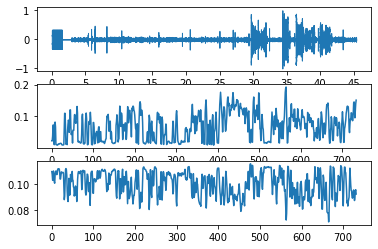

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 17.599782046042773
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0

The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 6.352631578947369
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 6.873684210526316
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 7.394736842105264
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 7.915789473684211
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 8.436842105263159
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 8.957894736842105
The frame error rate is: 0.0
ZCR Thresh

The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 6.873684210526316
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 7.394736842105264
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 7.915789473684211
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 8.436842105263159
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 8.957894736842105
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 9.478947368421053
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 10.0
The frame error rate is: 0.0
ZCR Threshold = 4.7894736842105265 RMS Threshold = 0.1
The frame error rate is: 21.44122054216047
ZCR Threshold = 4.7894736842105265 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 4.7894736842105265 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Thresh

The frame error rate is: 0.0
ZCR Threshold = 6.352631578947369 RMS Threshold = 9.478947368421053
The frame error rate is: 0.0
ZCR Threshold = 6.352631578947369 RMS Threshold = 10.0
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 0.1
The frame error rate is: 21.44122054216047
ZCR Threshold = 6.873684210526316 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Thresho

The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 6.352631578947369
The frame error rate is: 0.

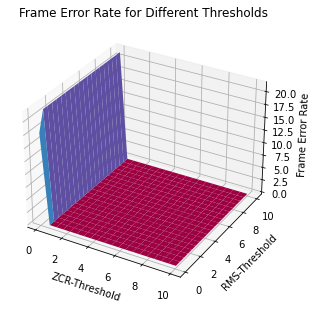

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_id_2.sph
(161880957,)
New Sample


<Figure size 432x288 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

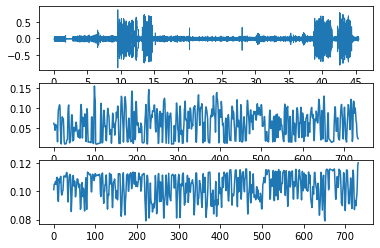

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 7.04263724288244
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0
Z

The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 6.352631578947369
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 6.873684210526316
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 7.394736842105264
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 7.915789473684211
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 8.436842105263159
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 8.957894736842105
The frame error rate is: 0.0
ZCR Thresh

The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 6.873684210526316
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 7.394736842105264
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 7.915789473684211
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 8.436842105263159
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 8.957894736842105
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 9.478947368421053
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 10.0
The frame error rate is: 0.0
ZCR Threshold = 4.7894736842105265 RMS Threshold = 0.1
The frame error rate is: 10.175725378013894
ZCR Threshold = 4.7894736842105265 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 4.7894736842105265 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Thres

The frame error rate is: 0.0
ZCR Threshold = 6.352631578947369 RMS Threshold = 9.478947368421053
The frame error rate is: 0.0
ZCR Threshold = 6.352631578947369 RMS Threshold = 10.0
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 0.1
The frame error rate is: 10.175725378013894
ZCR Threshold = 6.873684210526316 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Thresh

The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 6.352631578947369
The frame error rate is: 0.

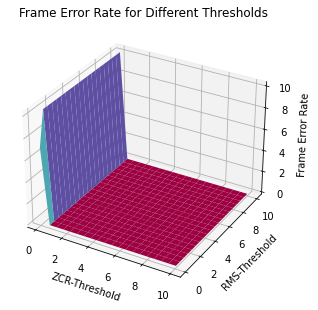

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_f1_2.sph
(161990766,)
New Sample


<Figure size 432x288 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

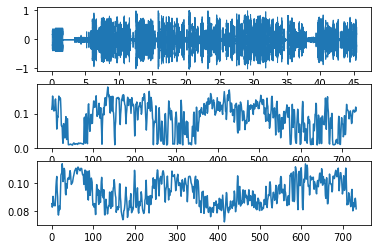

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 57.514293493057444
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 25.67383610127961
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 25.67383610127961
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 25.67383610127961
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 25.67383610127961
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 25.67383610127961
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 25.67383610127961
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 25.67383610127961
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 25.67383610127961
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 25.67383610127961
ZCR Threshold = 0.1 RMS Threshold = 5.3

The frame error rate is: 25.67383610127961
ZCR Threshold = 1.6631578947368424 RMS Threshold = 8.957894736842105
The frame error rate is: 25.67383610127961
ZCR Threshold = 1.6631578947368424 RMS Threshold = 9.478947368421053
The frame error rate is: 25.67383610127961
ZCR Threshold = 1.6631578947368424 RMS Threshold = 10.0
The frame error rate is: 25.67383610127961
ZCR Threshold = 2.18421052631579 RMS Threshold = 0.1
The frame error rate is: 57.80016335420637
ZCR Threshold = 2.18421052631579 RMS Threshold = 0.6210526315789474
The frame error rate is: 25.67383610127961
ZCR Threshold = 2.18421052631579 RMS Threshold = 1.142105263157895
The frame error rate is: 25.67383610127961
ZCR Threshold = 2.18421052631579 RMS Threshold = 1.6631578947368424
The frame error rate is: 25.67383610127961
ZCR Threshold = 2.18421052631579 RMS Threshold = 2.18421052631579
The frame error rate is: 25.67383610127961
ZCR Threshold = 2.18421052631579 RMS Threshold = 2.7052631578947373
The frame error rate is: 25.6

The frame error rate is: 25.67383610127961
ZCR Threshold = 3.747368421052632 RMS Threshold = 6.352631578947369
The frame error rate is: 25.67383610127961
ZCR Threshold = 3.747368421052632 RMS Threshold = 6.873684210526316
The frame error rate is: 25.67383610127961
ZCR Threshold = 3.747368421052632 RMS Threshold = 7.394736842105264
The frame error rate is: 25.67383610127961
ZCR Threshold = 3.747368421052632 RMS Threshold = 7.915789473684211
The frame error rate is: 25.67383610127961
ZCR Threshold = 3.747368421052632 RMS Threshold = 8.436842105263159
The frame error rate is: 25.67383610127961
ZCR Threshold = 3.747368421052632 RMS Threshold = 8.957894736842105
The frame error rate is: 25.67383610127961
ZCR Threshold = 3.747368421052632 RMS Threshold = 9.478947368421053
The frame error rate is: 25.67383610127961
ZCR Threshold = 3.747368421052632 RMS Threshold = 10.0
The frame error rate is: 25.67383610127961
ZCR Threshold = 4.268421052631579 RMS Threshold = 0.1
The frame error rate is: 57.

The frame error rate is: 25.67383610127961
ZCR Threshold = 5.831578947368421 RMS Threshold = 3.747368421052632
The frame error rate is: 25.67383610127961
ZCR Threshold = 5.831578947368421 RMS Threshold = 4.268421052631579
The frame error rate is: 25.67383610127961
ZCR Threshold = 5.831578947368421 RMS Threshold = 4.7894736842105265
The frame error rate is: 25.67383610127961
ZCR Threshold = 5.831578947368421 RMS Threshold = 5.310526315789474
The frame error rate is: 25.67383610127961
ZCR Threshold = 5.831578947368421 RMS Threshold = 5.831578947368421
The frame error rate is: 25.67383610127961
ZCR Threshold = 5.831578947368421 RMS Threshold = 6.352631578947369
The frame error rate is: 25.67383610127961
ZCR Threshold = 5.831578947368421 RMS Threshold = 6.873684210526316
The frame error rate is: 25.67383610127961
ZCR Threshold = 5.831578947368421 RMS Threshold = 7.394736842105264
The frame error rate is: 25.67383610127961
ZCR Threshold = 5.831578947368421 RMS Threshold = 7.915789473684211


The frame error rate is: 25.67383610127961
ZCR Threshold = 7.915789473684211 RMS Threshold = 1.142105263157895
The frame error rate is: 25.67383610127961
ZCR Threshold = 7.915789473684211 RMS Threshold = 1.6631578947368424
The frame error rate is: 25.67383610127961
ZCR Threshold = 7.915789473684211 RMS Threshold = 2.18421052631579
The frame error rate is: 25.67383610127961
ZCR Threshold = 7.915789473684211 RMS Threshold = 2.7052631578947373
The frame error rate is: 25.67383610127961
ZCR Threshold = 7.915789473684211 RMS Threshold = 3.2263157894736847
The frame error rate is: 25.67383610127961
ZCR Threshold = 7.915789473684211 RMS Threshold = 3.747368421052632
The frame error rate is: 25.67383610127961
ZCR Threshold = 7.915789473684211 RMS Threshold = 4.268421052631579
The frame error rate is: 25.67383610127961
ZCR Threshold = 7.915789473684211 RMS Threshold = 4.7894736842105265
The frame error rate is: 25.67383610127961
ZCR Threshold = 7.915789473684211 RMS Threshold = 5.31052631578947

The frame error rate is: 25.67383610127961
ZCR Threshold = 9.478947368421053 RMS Threshold = 8.957894736842105
The frame error rate is: 25.67383610127961
ZCR Threshold = 9.478947368421053 RMS Threshold = 9.478947368421053
The frame error rate is: 25.67383610127961
ZCR Threshold = 9.478947368421053 RMS Threshold = 10.0
The frame error rate is: 25.67383610127961
ZCR Threshold = 10.0 RMS Threshold = 0.1
The frame error rate is: 57.80016335420637
ZCR Threshold = 10.0 RMS Threshold = 0.6210526315789474
The frame error rate is: 25.67383610127961
ZCR Threshold = 10.0 RMS Threshold = 1.142105263157895
The frame error rate is: 25.67383610127961
ZCR Threshold = 10.0 RMS Threshold = 1.6631578947368424
The frame error rate is: 25.67383610127961
ZCR Threshold = 10.0 RMS Threshold = 2.18421052631579
The frame error rate is: 25.67383610127961
ZCR Threshold = 10.0 RMS Threshold = 2.7052631578947373
The frame error rate is: 25.67383610127961
ZCR Threshold = 10.0 RMS Threshold = 3.2263157894736847
The f

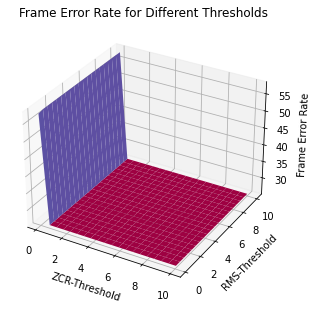

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_f1_4.sph
(132300003,)
New Sample


<Figure size 432x288 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

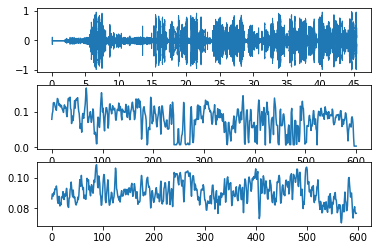

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 27.200000000000003
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0

The frame error rate is: 27.200000000000003
ZCR Threshold = 3.2263157894736847 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 3.2263157894736847 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 3.2263157894736847 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 3.2263157894736847 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 3.2263157894736847 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 3.2263157894736847 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 3.2263157894736847 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 3.2263157894736847 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 3.2263157894736847 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 3.2263157894736847 RMS Threshold = 5.310526315789474
T

The frame error rate is: 27.200000000000003
ZCR Threshold = 6.873684210526316 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 5.310526315789474
The frame e

The frame error rate is: 27.200000000000003
ZCR Threshold = 10.0 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0
ZCR Threshold = 10.0 RMS Thr

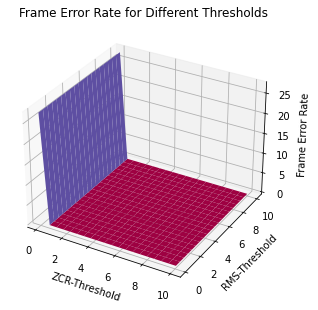

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_lw_2.sph
(80041503,)
New Sample


<Figure size 432x288 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

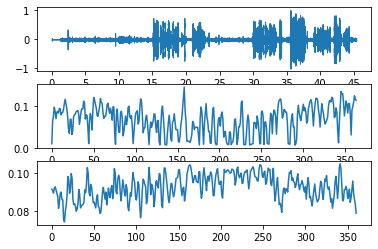

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 10.165289256198347
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0

The frame error rate is: 0.0
ZCR Threshold = 7.915789473684211 RMS Threshold = 9.478947368421053
The frame error rate is: 0.0
ZCR Threshold = 7.915789473684211 RMS Threshold = 10.0
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 0.1
The frame error rate is: 10.165289256198347
ZCR Threshold = 8.436842105263159 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Thresh

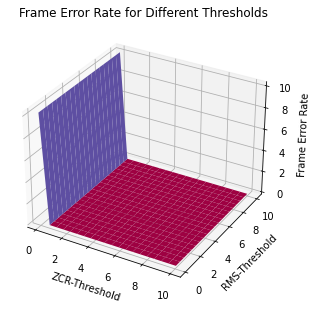

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_f1_1.sph
(162019652,)
New Sample


<Figure size 432x288 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

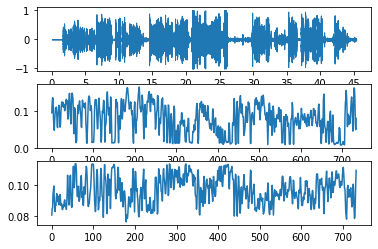

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 69.67469715530147
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 79.46100449162924
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 79.46100449162924
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 79.46100449162924
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 79.46100449162924
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 79.46100449162924
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 79.46100449162924
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 79.46100449162924
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 79.46100449162924
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 79.46100449162924
ZCR Threshold = 0.1 RMS Threshold = 5.31

The frame error rate is: 79.46100449162924
ZCR Threshold = 1.6631578947368424 RMS Threshold = 9.478947368421053
The frame error rate is: 79.46100449162924
ZCR Threshold = 1.6631578947368424 RMS Threshold = 10.0
The frame error rate is: 79.46100449162924
ZCR Threshold = 2.18421052631579 RMS Threshold = 0.1
The frame error rate is: 69.40247720157888
ZCR Threshold = 2.18421052631579 RMS Threshold = 0.6210526315789474
The frame error rate is: 79.46100449162924
ZCR Threshold = 2.18421052631579 RMS Threshold = 1.142105263157895
The frame error rate is: 79.46100449162924
ZCR Threshold = 2.18421052631579 RMS Threshold = 1.6631578947368424
The frame error rate is: 79.46100449162924
ZCR Threshold = 2.18421052631579 RMS Threshold = 2.18421052631579
The frame error rate is: 79.46100449162924
ZCR Threshold = 2.18421052631579 RMS Threshold = 2.7052631578947373
The frame error rate is: 79.46100449162924
ZCR Threshold = 2.18421052631579 RMS Threshold = 3.2263157894736847
The frame error rate is: 79.46

The frame error rate is: 79.46100449162924
ZCR Threshold = 3.747368421052632 RMS Threshold = 6.873684210526316
The frame error rate is: 79.46100449162924
ZCR Threshold = 3.747368421052632 RMS Threshold = 7.394736842105264
The frame error rate is: 79.46100449162924
ZCR Threshold = 3.747368421052632 RMS Threshold = 7.915789473684211
The frame error rate is: 79.46100449162924
ZCR Threshold = 3.747368421052632 RMS Threshold = 8.436842105263159
The frame error rate is: 79.46100449162924
ZCR Threshold = 3.747368421052632 RMS Threshold = 8.957894736842105
The frame error rate is: 79.46100449162924
ZCR Threshold = 3.747368421052632 RMS Threshold = 9.478947368421053
The frame error rate is: 79.46100449162924
ZCR Threshold = 3.747368421052632 RMS Threshold = 10.0
The frame error rate is: 79.46100449162924
ZCR Threshold = 4.268421052631579 RMS Threshold = 0.1
The frame error rate is: 69.40247720157888
ZCR Threshold = 4.268421052631579 RMS Threshold = 0.6210526315789474
The frame error rate is: 79

The frame error rate is: 79.46100449162924
ZCR Threshold = 5.831578947368421 RMS Threshold = 4.268421052631579
The frame error rate is: 79.46100449162924
ZCR Threshold = 5.831578947368421 RMS Threshold = 4.7894736842105265
The frame error rate is: 79.46100449162924
ZCR Threshold = 5.831578947368421 RMS Threshold = 5.310526315789474
The frame error rate is: 79.46100449162924
ZCR Threshold = 5.831578947368421 RMS Threshold = 5.831578947368421
The frame error rate is: 79.46100449162924
ZCR Threshold = 5.831578947368421 RMS Threshold = 6.352631578947369
The frame error rate is: 79.46100449162924
ZCR Threshold = 5.831578947368421 RMS Threshold = 6.873684210526316
The frame error rate is: 79.46100449162924
ZCR Threshold = 5.831578947368421 RMS Threshold = 7.394736842105264
The frame error rate is: 79.46100449162924
ZCR Threshold = 5.831578947368421 RMS Threshold = 7.915789473684211
The frame error rate is: 79.46100449162924
ZCR Threshold = 5.831578947368421 RMS Threshold = 8.436842105263159


The frame error rate is: 79.46100449162924
ZCR Threshold = 7.915789473684211 RMS Threshold = 1.6631578947368424
The frame error rate is: 79.46100449162924
ZCR Threshold = 7.915789473684211 RMS Threshold = 2.18421052631579
The frame error rate is: 79.46100449162924
ZCR Threshold = 7.915789473684211 RMS Threshold = 2.7052631578947373
The frame error rate is: 79.46100449162924
ZCR Threshold = 7.915789473684211 RMS Threshold = 3.2263157894736847
The frame error rate is: 79.46100449162924
ZCR Threshold = 7.915789473684211 RMS Threshold = 3.747368421052632
The frame error rate is: 79.46100449162924
ZCR Threshold = 7.915789473684211 RMS Threshold = 4.268421052631579
The frame error rate is: 79.46100449162924
ZCR Threshold = 7.915789473684211 RMS Threshold = 4.7894736842105265
The frame error rate is: 79.46100449162924
ZCR Threshold = 7.915789473684211 RMS Threshold = 5.310526315789474
The frame error rate is: 79.46100449162924
ZCR Threshold = 7.915789473684211 RMS Threshold = 5.83157894736842

The frame error rate is: 79.46100449162924
ZCR Threshold = 9.478947368421053 RMS Threshold = 9.478947368421053
The frame error rate is: 79.46100449162924
ZCR Threshold = 9.478947368421053 RMS Threshold = 10.0
The frame error rate is: 79.46100449162924
ZCR Threshold = 10.0 RMS Threshold = 0.1
The frame error rate is: 69.40247720157888
ZCR Threshold = 10.0 RMS Threshold = 0.6210526315789474
The frame error rate is: 79.46100449162924
ZCR Threshold = 10.0 RMS Threshold = 1.142105263157895
The frame error rate is: 79.46100449162924
ZCR Threshold = 10.0 RMS Threshold = 1.6631578947368424
The frame error rate is: 79.46100449162924
ZCR Threshold = 10.0 RMS Threshold = 2.18421052631579
The frame error rate is: 79.46100449162924
ZCR Threshold = 10.0 RMS Threshold = 2.7052631578947373
The frame error rate is: 79.46100449162924
ZCR Threshold = 10.0 RMS Threshold = 3.2263157894736847
The frame error rate is: 79.46100449162924
ZCR Threshold = 10.0 RMS Threshold = 3.747368421052632
The frame error ra

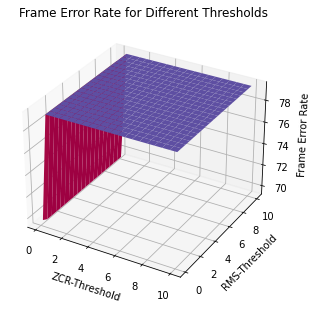

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_id_1.sph
(158684589,)
New Sample


<Figure size 432x288 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

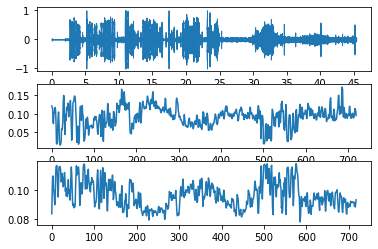

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 48.290717065036134
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 63.076709282934964
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 63.076709282934964
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 63.076709282934964
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 63.076709282934964
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 63.076709282934964
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 63.076709282934964
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 63.076709282934964
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 63.076709282934964
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 63.076709282934964
ZCR Threshold = 0.1 RMS Thresh

The frame error rate is: 63.076709282934964
ZCR Threshold = 1.6631578947368424 RMS Threshold = 10.0
The frame error rate is: 63.076709282934964
ZCR Threshold = 2.18421052631579 RMS Threshold = 0.1
The frame error rate is: 49.81934408004447
ZCR Threshold = 2.18421052631579 RMS Threshold = 0.6210526315789474
The frame error rate is: 63.076709282934964
ZCR Threshold = 2.18421052631579 RMS Threshold = 1.142105263157895
The frame error rate is: 63.076709282934964
ZCR Threshold = 2.18421052631579 RMS Threshold = 1.6631578947368424
The frame error rate is: 63.076709282934964
ZCR Threshold = 2.18421052631579 RMS Threshold = 2.18421052631579
The frame error rate is: 63.076709282934964
ZCR Threshold = 2.18421052631579 RMS Threshold = 2.7052631578947373
The frame error rate is: 63.076709282934964
ZCR Threshold = 2.18421052631579 RMS Threshold = 3.2263157894736847
The frame error rate is: 63.076709282934964
ZCR Threshold = 2.18421052631579 RMS Threshold = 3.747368421052632
The frame error rate is:

The frame error rate is: 63.076709282934964
ZCR Threshold = 3.747368421052632 RMS Threshold = 7.394736842105264
The frame error rate is: 63.076709282934964
ZCR Threshold = 3.747368421052632 RMS Threshold = 7.915789473684211
The frame error rate is: 63.076709282934964
ZCR Threshold = 3.747368421052632 RMS Threshold = 8.436842105263159
The frame error rate is: 63.076709282934964
ZCR Threshold = 3.747368421052632 RMS Threshold = 8.957894736842105
The frame error rate is: 63.076709282934964
ZCR Threshold = 3.747368421052632 RMS Threshold = 9.478947368421053
The frame error rate is: 63.076709282934964
ZCR Threshold = 3.747368421052632 RMS Threshold = 10.0
The frame error rate is: 63.076709282934964
ZCR Threshold = 4.268421052631579 RMS Threshold = 0.1
The frame error rate is: 49.81934408004447
ZCR Threshold = 4.268421052631579 RMS Threshold = 0.6210526315789474
The frame error rate is: 63.076709282934964
ZCR Threshold = 4.268421052631579 RMS Threshold = 1.142105263157895
The frame error rat

The frame error rate is: 63.076709282934964
ZCR Threshold = 5.831578947368421 RMS Threshold = 4.268421052631579
The frame error rate is: 63.076709282934964
ZCR Threshold = 5.831578947368421 RMS Threshold = 4.7894736842105265
The frame error rate is: 63.076709282934964
ZCR Threshold = 5.831578947368421 RMS Threshold = 5.310526315789474
The frame error rate is: 63.076709282934964
ZCR Threshold = 5.831578947368421 RMS Threshold = 5.831578947368421
The frame error rate is: 63.076709282934964
ZCR Threshold = 5.831578947368421 RMS Threshold = 6.352631578947369
The frame error rate is: 63.076709282934964
ZCR Threshold = 5.831578947368421 RMS Threshold = 6.873684210526316
The frame error rate is: 63.076709282934964
ZCR Threshold = 5.831578947368421 RMS Threshold = 7.394736842105264
The frame error rate is: 63.076709282934964
ZCR Threshold = 5.831578947368421 RMS Threshold = 7.915789473684211
The frame error rate is: 63.076709282934964
ZCR Threshold = 5.831578947368421 RMS Threshold = 8.4368421

The frame error rate is: 63.076709282934964
ZCR Threshold = 7.915789473684211 RMS Threshold = 1.142105263157895
The frame error rate is: 63.076709282934964
ZCR Threshold = 7.915789473684211 RMS Threshold = 1.6631578947368424
The frame error rate is: 63.076709282934964
ZCR Threshold = 7.915789473684211 RMS Threshold = 2.18421052631579
The frame error rate is: 63.076709282934964
ZCR Threshold = 7.915789473684211 RMS Threshold = 2.7052631578947373
The frame error rate is: 63.076709282934964
ZCR Threshold = 7.915789473684211 RMS Threshold = 3.2263157894736847
The frame error rate is: 63.076709282934964
ZCR Threshold = 7.915789473684211 RMS Threshold = 3.747368421052632
The frame error rate is: 63.076709282934964
ZCR Threshold = 7.915789473684211 RMS Threshold = 4.268421052631579
The frame error rate is: 63.076709282934964
ZCR Threshold = 7.915789473684211 RMS Threshold = 4.7894736842105265
The frame error rate is: 63.076709282934964
ZCR Threshold = 7.915789473684211 RMS Threshold = 5.31052

The frame error rate is: 63.076709282934964
ZCR Threshold = 9.478947368421053 RMS Threshold = 8.436842105263159
The frame error rate is: 63.076709282934964
ZCR Threshold = 9.478947368421053 RMS Threshold = 8.957894736842105
The frame error rate is: 63.076709282934964
ZCR Threshold = 9.478947368421053 RMS Threshold = 9.478947368421053
The frame error rate is: 63.076709282934964
ZCR Threshold = 9.478947368421053 RMS Threshold = 10.0
The frame error rate is: 63.076709282934964
ZCR Threshold = 10.0 RMS Threshold = 0.1
The frame error rate is: 49.81934408004447
ZCR Threshold = 10.0 RMS Threshold = 0.6210526315789474
The frame error rate is: 63.076709282934964
ZCR Threshold = 10.0 RMS Threshold = 1.142105263157895
The frame error rate is: 63.076709282934964
ZCR Threshold = 10.0 RMS Threshold = 1.6631578947368424
The frame error rate is: 63.076709282934964
ZCR Threshold = 10.0 RMS Threshold = 2.18421052631579
The frame error rate is: 63.076709282934964
ZCR Threshold = 10.0 RMS Threshold = 2.7

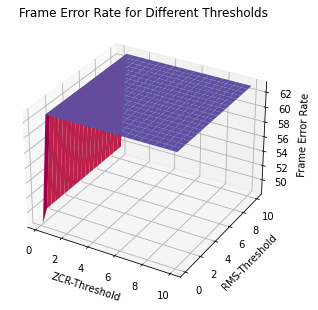

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_sm_2.sph
(161805326,)
New Sample


<Figure size 432x288 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

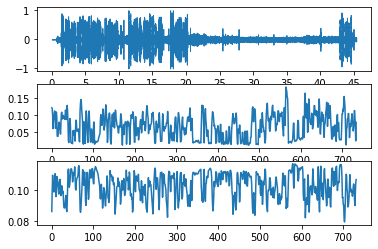

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 10.888525483783047
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0

The frame error rate is: 14.854183701281004
ZCR Threshold = 2.7052631578947373 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 2.7052631578947373 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 2.7052631578947373 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 2.7052631578947373 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 2.7052631578947373 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 2.7052631578947373 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 2.7052631578947373 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 2.7052631578947373 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 2.7052631578947373 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 2.7052631578947373 RMS Threshold = 5.310526315789474
T

The frame error rate is: 14.854183701281004
ZCR Threshold = 5.831578947368421 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 5.831578947368421 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 5.831578947368421 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 5.831578947368421 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 5.831578947368421 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 5.831578947368421 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 5.831578947368421 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 5.831578947368421 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 5.831578947368421 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 5.831578947368421 RMS Threshold = 5.310526315789474
The frame e

The frame error rate is: 14.854183701281004
ZCR Threshold = 8.957894736842105 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 5.310526315789474
The frame e

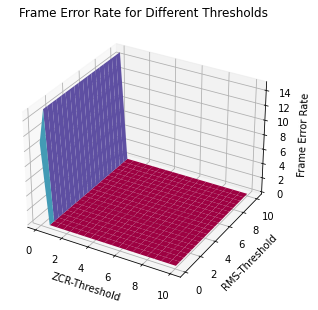

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_id_3.sph
(85995003,)
New Sample


<Figure size 432x288 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

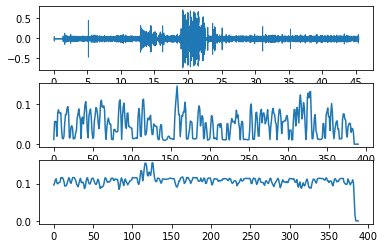

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 2.205128205128205
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0


The frame error rate is: 0.0
ZCR Threshold = 7.915789473684211 RMS Threshold = 7.394736842105264
The frame error rate is: 0.0
ZCR Threshold = 7.915789473684211 RMS Threshold = 7.915789473684211
The frame error rate is: 0.0
ZCR Threshold = 7.915789473684211 RMS Threshold = 8.436842105263159
The frame error rate is: 0.0
ZCR Threshold = 7.915789473684211 RMS Threshold = 8.957894736842105
The frame error rate is: 0.0
ZCR Threshold = 7.915789473684211 RMS Threshold = 9.478947368421053
The frame error rate is: 0.0
ZCR Threshold = 7.915789473684211 RMS Threshold = 10.0
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 0.1
The frame error rate is: 4.128205128205129
ZCR Threshold = 8.436842105263159 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 8.436842105263159 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshol

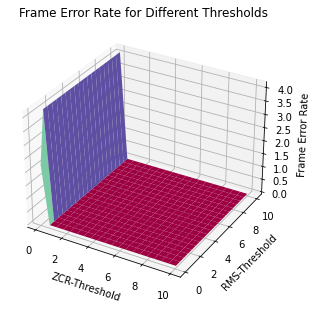

/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/log_f1_3.sph
(161676995,)
New Sample


<Figure size 432x288 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

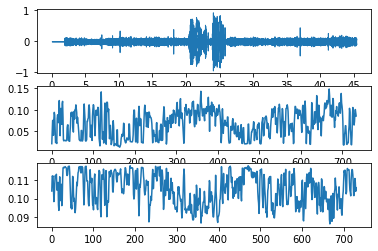

ZCR Threshold = 0.1 RMS Threshold = 0.1
The frame error rate is: 8.40152755046372
ZCR Threshold = 0.1 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 0.1 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0
Z

The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 6.352631578947369
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 6.873684210526316
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 7.394736842105264
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 7.915789473684211
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 8.436842105263159
The frame error rate is: 0.0
ZCR Threshold = 2.18421052631579 RMS Threshold = 8.957894736842105
The frame error rate is: 0.0
ZCR Thresh

The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 6.873684210526316
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 7.394736842105264
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 7.915789473684211
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 8.436842105263159
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 8.957894736842105
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 9.478947368421053
The frame error rate is: 0.0
ZCR Threshold = 4.268421052631579 RMS Threshold = 10.0
The frame error rate is: 0.0
ZCR Threshold = 4.7894736842105265 RMS Threshold = 0.1
The frame error rate is: 13.420621931260229
ZCR Threshold = 4.7894736842105265 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 4.7894736842105265 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Thres

The frame error rate is: 0.0
ZCR Threshold = 6.352631578947369 RMS Threshold = 9.478947368421053
The frame error rate is: 0.0
ZCR Threshold = 6.352631578947369 RMS Threshold = 10.0
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 0.1
The frame error rate is: 13.420621931260229
ZCR Threshold = 6.873684210526316 RMS Threshold = 0.6210526315789474
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 1.142105263157895
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 6.873684210526316 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Thresh

The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 1.6631578947368424
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 2.18421052631579
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 2.7052631578947373
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 3.2263157894736847
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 3.747368421052632
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 4.268421052631579
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 4.7894736842105265
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 5.310526315789474
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 5.831578947368421
The frame error rate is: 0.0
ZCR Threshold = 8.957894736842105 RMS Threshold = 6.352631578947369
The frame error rate is: 0.

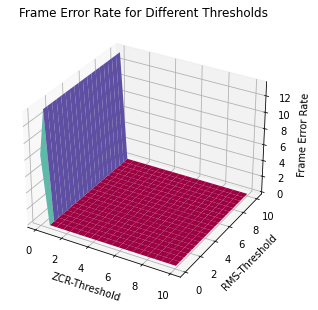

<Figure size 432x288 with 0 Axes>

In [10]:
#Threshold on ATC0
'''def get_zcr(x,sr,frame_length=25,hop_length=10, n_divs = 30):
    #Assume x is 1 dimensional
    shape = x.size
    cross_list = []
    div_size = shape//n_divs
    for i in range(n_divs):
        inputs = x[i*div_size:(i+1)*div_size]
        frame_arr = librosa.util.frame(inputs,frame_length,hop_length,axis = 0)
        temp_cross_arr = librosa.zero_crossings(frame_arr, threshold = -1)
        cross_list.append(temp_cross_arr)
    cross_arr = np.concatenate(cross_list)
    print("ZCR Shape")
    print(cross_arr.shape)
    return np.mean(cross_arr, axis = -1)
'''

def get_zcr(x,sr,frame_length=25,hop_length=10, n_divs = 30):
    frame_arr = librosa.util.frame(x,frame_length,hop_length,axis=0)
    cross_arr = librosa.zero_crossings(frame_arr, threshold=-1)
    return np.mean(cross_arr, axis = -1)

def get_rms(x,sr,frame_length=25,hop_length=10, n_divs = 30):
    shape = x.size
    rms_list = []
    div_size = shape//n_divs
    for i in range(n_divs):
        inputs = x[i*div_size:(i+1)*div_size]
        rms_list.append(librosa.feature.rms(inputs,frame_length=frame_length,hop_length = hop_length))
    cross_arr = np.concatenate(rms_list)
    print("RMS Shape")
    print(cross_arr.shape)
    return np.mean(cross_arr, axis= -1)

def unionise(transcript_list): #Collapse intervals like (1,2),(2,3) into (1,3)
    new_list = []
    for interval in transcript_list:
        start_pt = interval[0]
        end_pt = interval[1]
        final_elt = [-2,-1]
        if new_list:
            final_elt = new_list[-1]
        if final_elt[1] == start_pt:
            new_list[-1] = [final_elt[0],end_pt]
        else:
            new_list.append([start_pt,end_pt])
    return new_list

def get_transcripts(zcr_arr,rms_arr,zcr_t,rms_t, frame_length = 25, frame_hop=10,sr = 22050, min_interval = 1): 
    #Returns the transcripts given by the threshold algorithm. zcr_t and rms_t are the thresholds. It returns those
    # as voice segments which satisfy both the zcr threshold AND the rms threshold
    transcript_list = []
    on_flag = 0
    min_size = min(zcr_arr.size, rms_arr.size)
    for i in range(min_size):
        if((zcr_arr[i] <= zcr_t and rms_arr[i] > rms_t) and on_flag== 0):
            start_time = float(math.floor((frame_hop*i/sr))) #convert everything to seconds
            on_flag = 1
        if((zcr_arr[i] > zcr_t or rms_arr[i] <= rms_t) and on_flag == 1):
            end_time= float(math.floor(((frame_hop*(i-1)/sr)))) #convert everything to seconds
            if (end_time - start_time) > min_interval:
                on_flag = 0
                transcript_list.append([start_time,end_time])
    return unionise(transcript_list)

def is_in_interval(arr,idx): #arr is an array with each element being a tuple corresponding to an interval
    #function checks whether idx is in any interval in the list
    if not arr:
        return 0
    for pair in arr:
        start = pair[0]
        end = pair[1]
        if(start <= idx and end >=idx):
            return 1
    return 0

def get_tframe_error_rate(x,y_hat, y,sr = 22050):
    #Gets frame error rate - sums false positives and false negatives
    n = int(x.size//sr)
    err = 0
    for i in range(n):
        if(is_in_interval(y_hat,i) + is_in_interval(y,i) == 1): #This if condition means it is either a false positive or false negative - exactly one of the two is in the interval
            err = err + 1
    return 100*(err/n)

def get_plots(x,zcr,rms,index = 0, time_slice = 1000000, t = 45): #plots audio, zcr, and rms for one sample
    #The time indices used are from index*time_slice to (index+1)*time_slice
    print("New Sample")
    jump = int(sr*t//10)
    plt.figure(figsize=(14,5))
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    librosa.display.waveshow(x[index*time_slice:(index+1)*time_slice],sr, ax = ax1)
    ax2.plot(rms[index*jump:(index+1)*jump])
    ax3.plot(zcr[index*jump:(index+1)*jump])
    plt.show()
    return

def get_stats(x,zcr,rms, bins = 10):
    get_plots(x,zcr,rms)
    softening = 1e-9
    print("Stats for ZCR:")
    print(pd.DataFrame(zcr).describe())
    print("Stats for RMS:")
    print(pd.DataFrame(rms).describe())
    plt.figure(figsize=(14,5))
    fig,(ax1,ax2) = plt.subplots(2,1)
    ax1.hist(np.histogram(zcr, bins = bins, density = True), bins = bins)
    print("Histogram for RMS:")
    ax2.hist(np.histogram(rms, bins = bins, density = True), bins = bins)
    return


def get3dplots(frame_error_rate_list,zcr_threshold_list,rms_threshold_list,iteration, file_extension = '.png'):
    fig = plt.figure(figsize=(14,5))
    ax = fig.add_subplot(111, projection = '3d')
    n = len(zcr_threshold_list)
    m = len(rms_threshold_list)
    my_idx = 0
    #for zcr_elt in zcr_threshold_list:
    #    for rms_elt in rms_threshold_list:
    #        ax.scatter3D(zcr_elt, rms_elt, frame_error_rate_list[my_idx])
    #        my_idx = my_idx+1
    x1,y1 = np.meshgrid((zcr_threshold_list), (rms_threshold_list))
    print(np.shape((zcr_threshold_list)), np.shape((rms_threshold_list)), np.shape(frame_error_rate_list))
    ax.plot_surface(x1,y1,frame_error_rate_list.reshape([m,n]),cmap = 'Spectral')
    ax.set_xlabel("ZCR-Threshold")
    ax.set_ylabel("RMS-Threshold")
    ax.set_zlabel("Frame Error Rate")
    ax.set_title("Frame Error Rate for Different Thresholds")
    plt.show()
    plt.savefig('/project/graziul/ra/ajays/threshold_plots/frame_error_rate_' + str(iteration) + file_extension)
    return

def process_single_file(x, label, sr, zcr_threshold, rms_threshold):
    print("ZCR Threshold = " + str(zcr_threshold) + " RMS Threshold = " + str(rms_threshold))
    transcript_list = get_transcripts(zcr,rms,zcr_threshold,rms_threshold,frame_size*sr,frame_hop*sr,sr, 0)
    print("The frame error rate is: ", end = '')
    frame_error_rate = get_tframe_error_rate(x,transcript_list, label,sr)
    print(frame_error_rate)
    return frame_error_rate

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchaudio
import sys
import torch
import numpy as np
import pandas as pd
import os
import pickle
import re
import torchaudio.transforms as T
import math
import librosa
import librosa.display
import matplotlib.patches as patches
from glob import glob
import util
from util import audio_file
from util import *
from Losses import FocalLoss,WeightedFocalLoss
from StackedLSTM2 import StackedLSTM
from AttentionLSTM import Attention_LSTM
from Toy_Model import ToyModel
import time

zcr_list = []
rms_list = []
autocorrelation_list = []
labels_list = []
audio_file_arr = []
frame_size = 25
frame_hop = 10
idx = 0
transcript_list_arr = []
min_zcr_t = 0.1
min_rms_t = 0.1
max_zcr_t = 10
max_rms_t = 10
zcr_t_arr = np.linspace(min_zcr_t,max_zcr_t,20)
#zcr_threshold = 1
rms_t_arr = np.linspace(min_rms_t,max_rms_t,20)
k = 1000000

input_list = []
labels_list = []
txtfile = open('/project/graziul/ra/ajays/stats_atc0.txt','w')
txtfile.truncate(0)
#paths = ['/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/', '/project/graziul/data/corpora/atc0_comp/atc0_dca/data/audio/', '/project/graziul/data/corpora/atc0_comp/atc0_dfw/data/audio/']
paths = ['/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/']
for idx,path in enumerate(paths):
    for fpath in glob(path + '*.sph'):
        if(idx > k):
            break
        print(fpath)
        filename = fpath[-12:-4]
        label_file = path[:-6] + 'transcripts/' + filename + '.txt'
        waveform, sample_rate = torchaudio.load(fpath)
        effects = [['rate', '22050']]
        x,sr = torchaudio.sox_effects.apply_effects_tensor(waveform, sample_rate, effects)
        with open(label_file, 'r') as f:
            label = f.read()
        y = process_atc_label_line(label)
        x = x.squeeze().numpy()
        print(x.shape)
        input_list.append(x)
        labels_list.append(y)
        idx = idx+1
        zcr = np.array(np.squeeze(get_zcr(x,sr, frame_length=sr*frame_size,hop_length=sr*frame_hop)))
        zcr_list.append(zcr)
        rms = np.array(np.squeeze(librosa.feature.rms(x,frame_length=sr*frame_size,hop_length=sr*frame_hop)))
        #rms = np.array(np.squeeze(get_rms(x,sr,frame_length=sr*frame_size,hop_length=sr*frame_hop)))
        rms_list.append(rms)
        get_plots(x,zcr,rms)
        frame_error_rate_list = []
        for zcr_threshold in zcr_t_arr:
            for rms_threshold in rms_t_arr:
                frame_error_rate = process_single_file(x,y,sr,zcr_threshold,rms_threshold)
                frame_error_rate_list.append(frame_error_rate)
                writeline = filename + ' ' + str(zcr_threshold) + ' ' + str(rms_threshold) + ' ' + str(frame_error_rate) + '\n'
                txtfile.write(writeline)
        frame_error_rate_list = np.array(frame_error_rate_list)
        get3dplots(frame_error_rate_list, zcr_t_arr, rms_t_arr,idx)       
        
    if(idx>k):
        break